# This is an example Jupyter Notebook
**It demonstrates some simple data analysis in Python using pandas and matplotlib to produce plots.**  

- This Jupiter Notebook file, and an executable script with all the code below can be found here: [https://github.com/hobocz/python_templates](https://github.com/hobocz/python_templates) along with a variety of other Python templates and examples.
- *File: "MLB Player Batting 2022.csv" is credited to www.baseball-reference.com*
<hr>

### First lets do our imports:

In [15]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Next import the data and clean it up a bit:

In [16]:
    data_file = 'https://raw.githubusercontent.com/hobocz/python_templates/main/test_data/MLB%20Player%20Batting%202022.csv'
    PBDF = pd.read_csv(data_file)
    # Update some column names for readability
    PBDF = PBDF.rename(columns={'Name': 'Player', 'Tm': 'Team'})
    # Remove records where Team is 'TOT' (this is an aggregate and creates redundancy)
    PBDF = PBDF[PBDF['Team'] != 'TOT']
    # change default 'object' dtypes to pandas preferred string type
    PBDF[['Player', 'Team', 'Lg', 'Pos Summary', 'Name-additional']] = \
        PBDF[['Player', 'Team', 'Lg', 'Pos Summary', 'Name-additional']].astype(pd.StringDtype())

*Let's take a peek and make sure we got the data ok...*

In [17]:
PBDF.head()

,Rk,Player,Age,Team,Lg,G,PA,AB,R,H,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary,Name-additional
1,2.0,CJ Abrams*,21.0,SDP,NL,46,139,125,16,29,...,0.605,77.0,40,4,6,2,2,0,64/H9D,abramcj01
2,3.0,CJ Abrams*,21.0,WSN,NL,44,163,159,17,41,...,0.603,75.0,52,1,3,0,0,0,6/H,abramcj01
4,5.0,Albert Abreu,26.0,KCR,AL,1,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,/1,abreual01
5,6.0,José Abreu,35.0,CHW,AL,157,679,601,85,183,...,0.824,133.0,268,19,12,0,4,2,*3D,abreujo02
6,7.0,Ronald Acuna Jr.,24.0,ATL,NL,119,533,467,71,124,...,0.764,114.0,193,8,10,0,3,4,9D/H8,acunaro01


### Now lets start making charts

#### 1. Create a pie chart showing:
- runs per player
- for players with at least 50 games
- on the Astros only

<AxesSubplot: title={'center': 'Astros: Runs per player with\nat least 50 games'}>

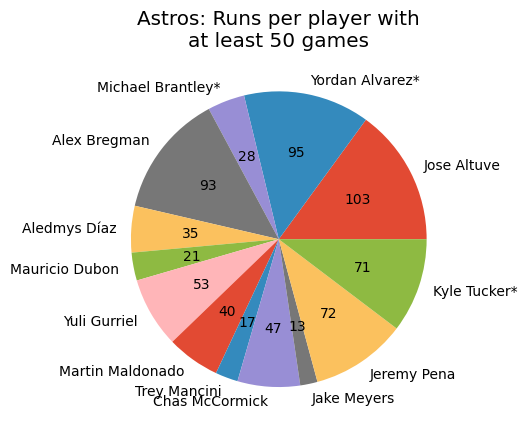

In [18]:
    # Apply a default style to all charts
    matplotlib.style.use('ggplot')
    
    HOU = PBDF[(PBDF['Team'] == 'HOU') & (PBDF['G'] >= 50)][['Player', 'R']]
    run_vals = HOU['R']
    # The lambda function calculates the original values to be shown in the pie slices
    run_vals.plot.pie(labels=HOU['Player'], title = 'Astros: Runs per player with\nat least 50 games', 
        ylabel = '', legend = False, autopct=lambda x: '{:.0f}'.format(x*run_vals.sum()/100))

#### 2. Create a scatterplot showing:
- home runs vs strike outs
- add a trend line
- show the correlation value in the title

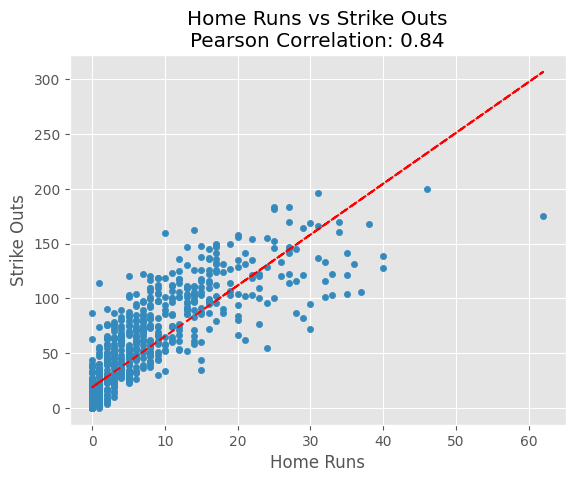

In [19]:
    corr_value = PBDF['HR'].corr(PBDF['SO'], method = 'pearson')
    title_str = f'Home Runs vs Strike Outs\nPearson Correlation: {str(round(corr_value, 2))}'
    PBDF.plot.scatter(x ='HR', y ='SO', title = title_str, xlabel = 'Home Runs', ylabel = 'Strike Outs')
    # 'z' and 'p' below are for calculating the trendline
    z = np.polyfit(PBDF['HR'], PBDF['SO'], 1)
    p = np.poly1d(z)
    plt.plot(PBDF['HR'], p(PBDF['HR']), "r--")

#### 3. Finally create a boxplot showing:
- the distribution of home runs per team

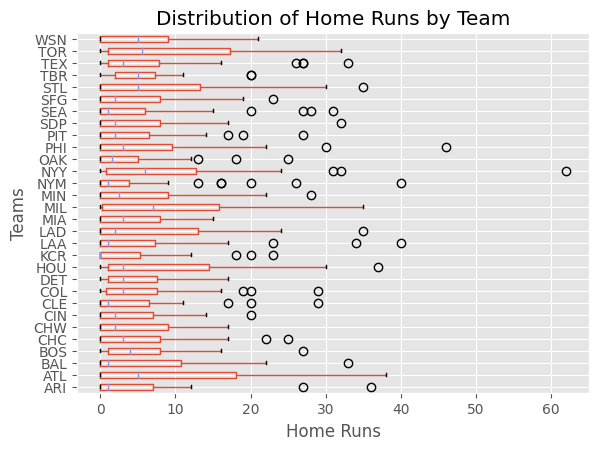

In [20]:
    PBDF[['Team','HR']].boxplot(by = 'Team', xlabel = 'Home Runs', ylabel = 'Teams', vert = False)
    plt.suptitle('')
    plt.title('Distribution of Home Runs by Team')
    plt.show()